# DECSC 131 Final Exam

J. E. J. Gonzales

<b>Instructions:</b> Answer the following questions below completely. Make sure that you are able to generate the expected outputs from the test questions when your notebook is ran from top to bottom for reproducibility. This assessment is all over 100 points. This notebook is due on <b>May 27, 2022 (Friday, 11:59 pm)</b>. Submit this notebook along with a [Certificate of Authorship](https://docs.google.com/document/d/1RmGH0oEeOrfxJWE15DQsn-w35nWDcRU2-7hjjNOfdJs/edit) as linked here.

Please make sure to cite all of your sources, especially if you intend to copy code from materials found online (except documentation, no need to cite this). This examination is meant to be taken individually. You are not allowed to collaborate with your learning teammates and discuss the answers to this examination. Evidence of cheating or collaboration while taking this exam would be considered as cheating and is punishable by <b>expulsion from the Ateneo de Manila University</b>. Each student taking this exam also has the <b>responsibility to report</b> possible cheating or collaboration cases that they are aware of, or else they would be considered complicit (and also liable) for the commission of the act.

## Case 1: Pitchfork

Pitchfork is a music-centric online magazine. It was started in 1995 and grew out of independent music reviewing into a general publication format, but is still famed for its variety music reviews. 

Since 1998, Pitchfork has published five new reviews every weekday. In 2016, Pitchfork added an additional five reviews on Saturdays, as well as a "Sunday Reviews" section containing long-form articles on a classic albums (one review per week, published on Sundays). They've also occasionally published more targeted series of reviews (such as following the deaths of David Bowie and Prince).

The typical review addresses a single release by a specific artist, and is attributed to a single author. All reviews are given a numerical score (0.0-10.0), are labeled by genre, report the record label (if any), and contain several paragraphs of text (the review itself). Since 2003, authors have awarded some releases the title "Best New Music", which means what you'd think. Best New Music albums are displayed prominently on Pitchfork, and even have their own page.

The `database.sqlite` file contains all the 18000+ reviews that were scraped from the [Pitchfork](https://pitchfork.com/) website, dating all the way from January 1999 to January 2017. The database file contains six tables, in which you would be tasked to perform exploratory data analysis on.

In [1]:
import sqlite3
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ray
ray.init()
conn = sqlite3.connect('database.sqlite')

2022-05-26 04:29:43,913	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265


In [2]:
# list of tables

pd.read_sql("""
SELECT * 
FROM sqlite_master 
""", conn)

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


,type,name,tbl_name,rootpage,sql
0,table,reviews,reviews,2,"CREATE TABLE reviews (\n\treviewid INTEGER,\n\..."
1,table,artists,artists,3,"CREATE TABLE artists (\n\treviewid INTEGER, ar..."
2,table,genres,genres,4,"CREATE TABLE genres (\n\treviewid INTEGER, gen..."
3,table,labels,labels,5,"CREATE TABLE labels (\n\treviewid INTEGER, lab..."
4,table,years,years,6,"CREATE TABLE years (\n\treviewid INTEGER, year..."
5,table,content,content,7,"CREATE TABLE content (\n\treviewid INTEGER, co..."


## Question 1 (5 pts.)

Generate a dataframe via a SQL statement that outputs the `number of reviews published per year` (name this column as `num_reviews` in the table) along with the `average numerical score per year` (name this `avg_score`) from 2004 up to 2016. Your final answer should only be a SQL statement, you are not allowed to use Pandas to further manipulate the dataframe here.

In [7]:
query = """
SELECT pub_year, COUNT(reviewid) as num_reviews, AVG(score) as avg_score
FROM reviews
GROUP BY pub_year
"""

df_year = pd.read_sql(query, conn)
df_year

,pub_year,num_reviews,avg_score
0,1999,223,6.869507
1,2000,348,6.791954
2,2001,456,7.132675
3,2002,923,6.822102
4,2003,1060,6.940660
5,2004,1121,7.195629
6,2005,1186,7.045953
7,2006,1189,6.979058
8,2007,1216,6.884622
9,2008,1201,6.880183


## Question 2 (5 pts.)

Visualize the number of reviews published per year along with the average numerical score of the reviews from 2004 up to 2016 in two separate <b>line plots</b>. Please use the Matplotlib object oriented interface (i.e. subplots) in generating your plots. Append your plots with their respective titles, along with their x and y-axis labels respectively.

You are not allowed to make further manipulations from the dataframe generated in the previous question in constructing the plot.

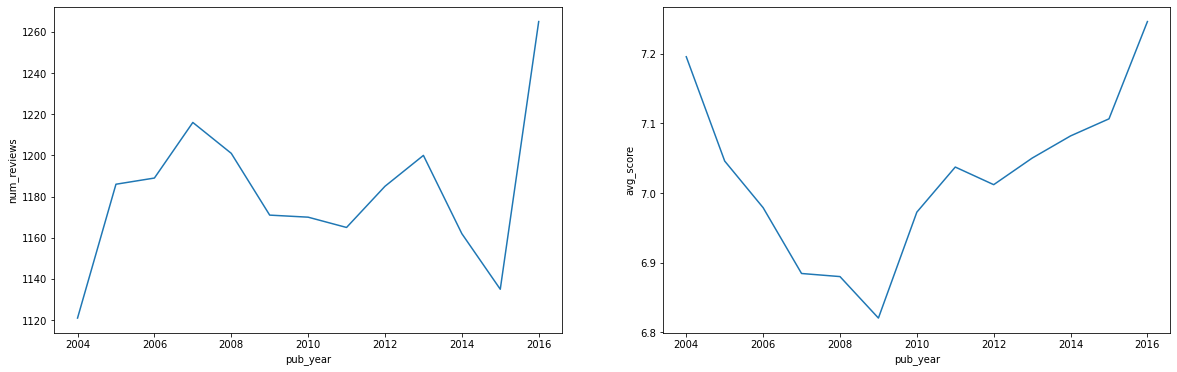

In [22]:

fig, ax = plt.subplots(figsize=(20, 6), nrows=1, ncols=2)
ax[0].plot(df_year[(df_year['pub_year']>=2004) & (df_year['pub_year']<=2016)].pub_year,
           df_year[(df_year['pub_year']>=2004) & (df_year['pub_year']<=2016)].num_reviews)
ax[0].set_xlabel('pub_year')
ax[0].set_ylabel('num_reviews')
ax[1].plot(df_year[(df_year['pub_year']>=2004) & (df_year['pub_year']<=2016)].pub_year,
           df_year[(df_year['pub_year']>=2004) & (df_year['pub_year']<=2016)].avg_score)
ax[1].set_xlabel('pub_year')
ax[1].set_ylabel('avg_score')
plt.show()

## Question 3 (5 pts.)

Generate a dataframe via a SQL statement that lists down the number of reviews per `genre` (name this column as `num_reviews`) along with the average numerical score (name this as `avg_score`) per `genre` such that they are written by `contributors`. Your final answer should only be a SQL statement, you are not allowed to use Pandas to further manipulate the dataframe here.

In [97]:
query = """
SELECT g.genre, COUNT(r.reviewid) as num_reviews, AVG(r.score) as avg_score
FROM reviews as r
JOIN genres as g ON r.reviewid = g.reviewid
WHERE r.author_type = 'contributor'
GROUP BY g.genre
"""

df_genre = pd.read_sql(query, conn)
df_genre

,genre,num_reviews,avg_score
0,None,1768,7.056674
1,electronic,2495,6.907535
2,experimental,1220,7.299590
3,folk/country,494,7.293725
4,global,157,7.453503
5,jazz,268,7.364925
6,metal,559,7.086762
7,pop/r&b,974,6.938706
8,rap,1058,6.879017
9,rock,6214,6.985935


## Question 4 (5 pts.)

Visualize the number of reviews published per genre along with the average numerical score of all the reviews that are written by `contributors` per `genre` in two separate <b>bar plots</b>. Please use the Matplotlib object oriented interface (i.e. subplots) in generating your plots. Append your plots with their respective titles, along with their x and y-axis labels respectively.

You are not allowed to make further manipulations from the dataframe generated in the previous question in constructing the plot.

In [98]:
df_genre.dtypes

genre           object
num_reviews      int64
avg_score      float64
dtype: object

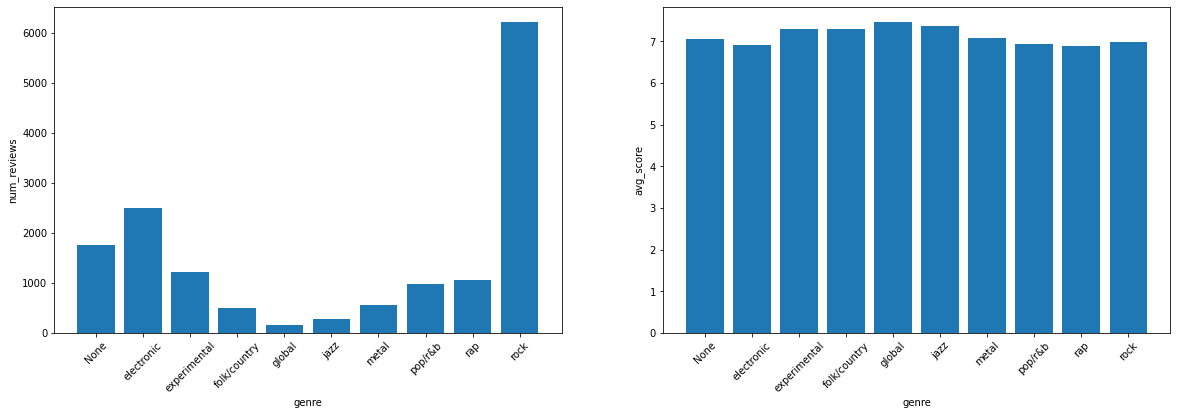

In [107]:
df_genre['genre'] = df_genre['genre'].astype(str)
fig, ax = plt.subplots(figsize=(20, 6), nrows=1, ncols=2)
ax[0].bar(df_genre['genre'],
           df_genre['num_reviews'])
ax[0].set_xticklabels(df_genre['genre'], rotation=45)
ax[0].set_xlabel('genre')
ax[0].set_ylabel('num_reviews')
ax[1].bar(df_genre['genre'],
           df_genre['avg_score'])
ax[1].set_xticklabels(df_genre['genre'], rotation=45)
ax[1].set_xlabel('genre')
ax[1].set_ylabel('avg_score')
plt.show()

## Question 5 (5 pts.)

Generate a dataframe via a SQL statement that displays the `reviewid`, `title` of the song, `artist` of the song, `genre` of the song, `author` of the review, `publication_date` of the review, and the actual `content` of the review in a single table. Your final answer should only be a SQL statement, you are not allowed to use Pandas to further manipulate the dataframe here.

In [121]:
query = """
SELECT r.reviewid, r.title, r.artist, g.genre, r.author, pub_day || '-' || pub_month || '-' || pub_year as publication_date, c.content
FROM reviews as r
JOIN genres as g ON r.reviewid = g.reviewid
JOIN content as c
ON r.reviewid = c.reviewid
"""

df_reviews = pd.read_sql(query, conn)
df_reviews

,reviewid,title,artist,genre,author,publication_date,content
0,22703,mezzanine,massive attack,electronic,nate patrin,8-1-2017,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,metal,zoe camp,7-1-2017,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,rock,david glickman,7-1-2017,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",rock,jenn pelly,6-1-2017,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,electronic,kevin lozano,6-1-2017,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...
22705,5376,out of tune,mojave 3,rock,jason josephes,12-1-1999,"Out of Tune is a Steve Martin album. Yes, I'l..."
22706,2413,"singles breaking up, vol. 1",don caballero,experimental,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re..."
22707,2413,"singles breaking up, vol. 1",don caballero,metal,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re..."
22708,2413,"singles breaking up, vol. 1",don caballero,rock,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re..."


## Question 6 (20 pts.)

Cluster the actual text `reviews` generated from the query made in the previous question. Use k-means clustering as the clustering algorithm, and find the optimal number of clusters (by setting different number of clusters from 2 to 10, inclusive) using either the <b>elbow plot</b> or the <b>Calinski-Harabasz score</b>.

Apply the usual text cleaning steps (tokenization, stop word removal, stemming/lemmatization) before vectorizing the text reviews. Use the `TF-IDF Vectorizer` in order to be able to convert the text into numeric format. Feel free to tweak the different hyperparameters (e.g. `min_df`, `max_df`, `max_features`, etc.) of scikit-learn's [TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) so long as there are no `numeric` features/tokens after vectorizing the reviews.

<b>Rubric for Grading</b>:

5 pts - Successful Text Cleaning

8 pts - Successful Text Cleaning and Vectorization

12 pts - Successful Text Cleaning and Vectorization, with some attempt to cluster text but did not tune the K-Means Clustering hyperparameter

20 pts - Successful Text Cleaning and Vectorization, with hyperparameter tuning of the K-Means Clustering parameter and then assigned each review to a specific cluster accordingly)

In [3]:
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk
from tqdm.notebook import tqdm
import spacy
from nltk.corpus import stopwords
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True) # remove mentions/handles
regex_tokenizer = RegexpTokenizer(r'[^\s,\.\-\?!:;\(\)\"\"\$\%\&\*\/\’\'0-9]+') # remove unnecessary punctuations
import string

en = spacy.load('en_core_web_sm')
spacy_stopwords = list(en.Defaults.stop_words)
stop_words = (stopwords.words('english') + spacy_stopwords + 
              list(string.punctuation))

In [124]:
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True) # remove mentions/handles
regex_tokenizer = RegexpTokenizer(r'[^\s,\.\-\?!:;\(\)\"\"\$\%\&\*\/\’\'0-9]+') # remove unnecessary punctuations

# tokenization
df_reviews['tokenized_tweets'] = [' '.join(
    tweet_tokenizer.tokenize(df_reviews['content'][i].lower())) 
                        for i in tqdm(range(df_reviews.shape[0]))]
df_reviews['tokenized_tweets'] = [' '.join(
    regex_tokenizer.tokenize(df_reviews['content'][i])) 
                        for i in tqdm(range(df_reviews.shape[0]))]

  0%|          | 0/22710 [00:00<?, ?it/s]

  0%|          | 0/22710 [00:00<?, ?it/s]

In [4]:
df_reviews = pd.read_csv('tokenized.csv')

In [5]:
df_reviews

,Unnamed: 0,reviewid,title,artist,genre,author,publication_date,content,tokenized_tweets
0,0,22703,mezzanine,massive attack,electronic,nate patrin,8-1-2017,"“Trip-hop” eventually became a ’90s punchline,...",“Trip hop” eventually became a s punchline a m...
1,1,22721,prelapsarian,krallice,metal,zoe camp,7-1-2017,"Eight years, five albums, and two EPs in, the ...",Eight years five albums and two EPs in the New...
2,2,22659,all of them naturals,uranium club,rock,david glickman,7-1-2017,Minneapolis’ Uranium Club seem to revel in bei...,Minneapolis Uranium Club seem to revel in bein...
3,3,22661,first songs,"kleenex, liliput",rock,jenn pelly,6-1-2017,Kleenex began with a crash. It transpired one ...,Kleenex began with a crash It transpired one n...
4,4,22725,new start,taso,electronic,kevin lozano,6-1-2017,It is impossible to consider a given release b...,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...,...,...
22705,22705,5376,out of tune,mojave 3,rock,jason josephes,12-1-1999,"Out of Tune is a Steve Martin album. Yes, I'l...",Out of Tune is a Steve Martin album Yes I ll e...
22706,22706,2413,"singles breaking up, vol. 1",don caballero,experimental,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...
22707,22707,2413,"singles breaking up, vol. 1",don caballero,metal,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...
22708,22708,2413,"singles breaking up, vol. 1",don caballero,rock,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...


In [6]:
df_reviews['tokenized_tweets'] = df_reviews['tokenized_tweets'].astype(str)
df_reviews.dtypes

Unnamed: 0           int64
reviewid             int64
title               object
artist              object
genre               object
author              object
publication_date    object
content             object
tokenized_tweets       <U0
Name: 0, dtype: object

In [144]:
#df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_reviews['stopped_tweets'] = df_reviews['tokenized_tweets'].apply(lambda x:" ".join([text for text in 
                                          x.split() if text not in stop_words]))
df_reviews

,Unnamed: 0,reviewid,title,artist,genre,author,publication_date,content,tokenized_tweets,stopped_tweets
0,0,22703,mezzanine,massive attack,electronic,nate patrin,8-1-2017,"“Trip-hop” eventually became a ’90s punchline,...",“Trip hop” eventually became a s punchline a m...,“Trip hop” eventually punchline music press sh...
1,1,22721,prelapsarian,krallice,metal,zoe camp,7-1-2017,"Eight years, five albums, and two EPs in, the ...",Eight years five albums and two EPs in the New...,Eight years albums EPs New York based outfit K...
2,2,22659,all of them naturals,uranium club,rock,david glickman,7-1-2017,Minneapolis’ Uranium Club seem to revel in bei...,Minneapolis Uranium Club seem to revel in bein...,Minneapolis Uranium Club revel aggressively ob...
3,3,22661,first songs,"kleenex, liliput",rock,jenn pelly,6-1-2017,Kleenex began with a crash. It transpired one ...,Kleenex began with a crash It transpired one n...,Kleenex began crash It transpired night long f...
4,4,22725,new start,taso,electronic,kevin lozano,6-1-2017,It is impossible to consider a given release b...,It is impossible to consider a given release b...,It impossible consider given release footwork ...
...,...,...,...,...,...,...,...,...,...,...
22705,22705,5376,out of tune,mojave 3,rock,jason josephes,12-1-1999,"Out of Tune is a Steve Martin album. Yes, I'l...",Out of Tune is a Steve Martin album Yes I ll e...,Out Tune Steve Martin album Yes I explain Once...
22706,22706,2413,"singles breaking up, vol. 1",don caballero,experimental,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...
22707,22707,2413,"singles breaking up, vol. 1",don caballero,metal,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...
22708,22708,2413,"singles breaking up, vol. 1",don caballero,rock,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...


In [153]:
en = spacy.load('en_core_web_sm')
df_reviews['stemmed_tweets'] = ([" ".join([token.lemma_ for token in
                                en(df_reviews['stopped_tweets'].values[i])]) 
                                for i in tqdm(range(df_reviews.shape[0]))])
df_reviews

  0%|          | 0/22710 [00:00<?, ?it/s]

,Unnamed: 0,reviewid,title,artist,genre,author,publication_date,content,tokenized_tweets,stopped_tweets,stemmed_tweets
0,0,22703,mezzanine,massive attack,electronic,nate patrin,8-1-2017,"“Trip-hop” eventually became a ’90s punchline,...",“Trip hop” eventually became a s punchline a m...,“Trip hop” eventually punchline music press sh...,""" trip hop "" eventually punchline music press ..."
1,1,22721,prelapsarian,krallice,metal,zoe camp,7-1-2017,"Eight years, five albums, and two EPs in, the ...",Eight years five albums and two EPs in the New...,Eight years albums EPs New York based outfit K...,eight year album EPs New York base outfit Kral...
2,2,22659,all of them naturals,uranium club,rock,david glickman,7-1-2017,Minneapolis’ Uranium Club seem to revel in bei...,Minneapolis Uranium Club seem to revel in bein...,Minneapolis Uranium Club revel aggressively ob...,Minneapolis Uranium Club revel aggressively ob...
3,3,22661,first songs,"kleenex, liliput",rock,jenn pelly,6-1-2017,Kleenex began with a crash. It transpired one ...,Kleenex began with a crash It transpired one n...,Kleenex began crash It transpired night long f...,Kleenex begin crash it transpire night long fo...
4,4,22725,new start,taso,electronic,kevin lozano,6-1-2017,It is impossible to consider a given release b...,It is impossible to consider a given release b...,It impossible consider given release footwork ...,it impossible consider give release footwork a...
...,...,...,...,...,...,...,...,...,...,...,...
22705,22705,5376,out of tune,mojave 3,rock,jason josephes,12-1-1999,"Out of Tune is a Steve Martin album. Yes, I'l...",Out of Tune is a Steve Martin album Yes I ll e...,Out Tune Steve Martin album Yes I explain Once...,out Tune Steve Martin album yes I explain once...
22706,22706,2413,"singles breaking up, vol. 1",don caballero,experimental,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...,well kid I go read review guy album what Burns...
22707,22707,2413,"singles breaking up, vol. 1",don caballero,metal,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...,well kid I go read review guy album what Burns...
22708,22708,2413,"singles breaking up, vol. 1",don caballero,rock,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...,well kid I go read review guy album what Burns...


In [8]:
df_reviews.to_csv('stemmed.csv')

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.8,max_features=300)
tfidf = tfidf_vectorizer.fit_transform(df_reviews['stemmed_tweets'])
tfidf


<22710x300 sparse matrix of type '<class 'numpy.float64'>'
	with 1731968 stored elements in Compressed Sparse Row format>

In [164]:
df_tfidf = pd.DataFrame(tfidf.toarray(), 
                        columns=tfidf_vectorizer.get_feature_names())
df_tfidf

,acoustic,act,actually,add,age,all,american,and,approach,arrangement,...,white,with,word,work,world,write,year,you,young,your
0,0.00000,0.0,0.0,0.0,0.000000,0.048861,0.000000,0.120144,0.0,0.0,...,0.000000,0.000000,0.044278,0.057822,0.000000,0.000000,0.170823,0.069184,0.051112,0.000000
1,0.00000,0.0,0.0,0.0,0.129472,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066333,0.000000,0.000000,0.000000
2,0.00000,0.0,0.0,0.0,0.000000,0.158929,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046303,0.000000,0.000000,0.000000
3,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060920,0.0,0.0,...,0.000000,0.093604,0.044903,0.029319,0.080059,0.045121,0.086618,0.140322,0.000000,0.000000
4,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.148303,0.000000,0.000000,0.048681,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22705,0.08097,0.0,0.0,0.0,0.000000,0.080667,0.000000,0.099177,0.0,0.0,...,0.092209,0.076193,0.073101,0.047731,0.065167,0.000000,0.047004,0.114220,0.000000,0.186755
22706,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.143563,0.075765,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087257,0.000000,0.000000
22707,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.143563,0.075765,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087257,0.000000,0.000000
22708,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.143563,0.075765,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087257,0.000000,0.000000


In [167]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
inertias_list = []
predictions_list = []
calinski_harabasz_score_list = [] 
for k in tqdm(range(2, 10)):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(df_tfidf.to_numpy())
    inertias_list.append(kmeans_model.inertia_)
    cluster_predictions = kmeans_model.labels_ 
    predictions_list.append(kmeans_model.labels_)
    calinski_harabasz_score_list.append(
        calinski_harabasz_score(df_tfidf.to_numpy(), cluster_predictions))

  0%|          | 0/8 [00:00<?, ?it/s]

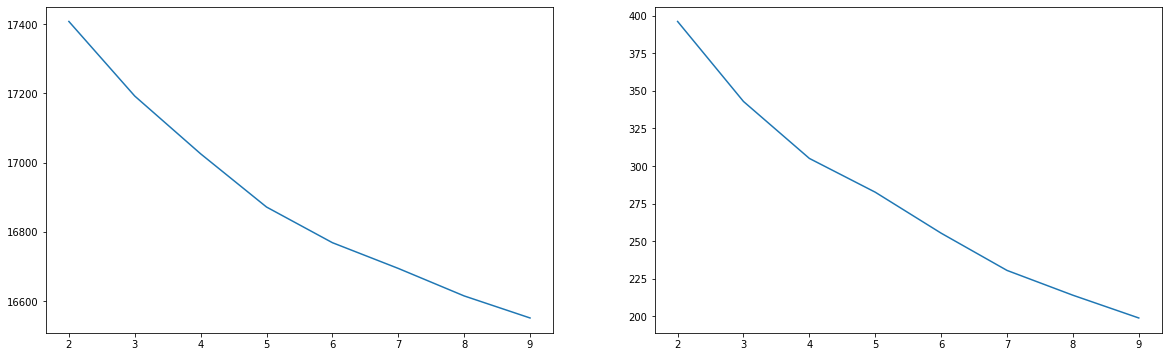

In [169]:
fig, ax = plt.subplots(figsize=(20, 6), nrows=1, ncols=2)
ax[0].plot(range(2,10),inertias_list)
ax[1].plot(range(2,10),calinski_harabasz_score_list)
#higher CH with 2

In [170]:
df_reviews['cluster']= predictions_list[0]
df_reviews

,Unnamed: 0,reviewid,title,artist,genre,author,publication_date,content,tokenized_tweets,stopped_tweets,stemmed_tweets,cluster
0,0,22703,mezzanine,massive attack,electronic,nate patrin,8-1-2017,"“Trip-hop” eventually became a ’90s punchline,...",“Trip hop” eventually became a s punchline a m...,“Trip hop” eventually punchline music press sh...,""" trip hop "" eventually punchline music press ...",1
1,1,22721,prelapsarian,krallice,metal,zoe camp,7-1-2017,"Eight years, five albums, and two EPs in, the ...",Eight years five albums and two EPs in the New...,Eight years albums EPs New York based outfit K...,eight year album EPs New York base outfit Kral...,0
2,2,22659,all of them naturals,uranium club,rock,david glickman,7-1-2017,Minneapolis’ Uranium Club seem to revel in bei...,Minneapolis Uranium Club seem to revel in bein...,Minneapolis Uranium Club revel aggressively ob...,Minneapolis Uranium Club revel aggressively ob...,0
3,3,22661,first songs,"kleenex, liliput",rock,jenn pelly,6-1-2017,Kleenex began with a crash. It transpired one ...,Kleenex began with a crash It transpired one n...,Kleenex began crash It transpired night long f...,Kleenex begin crash it transpire night long fo...,0
4,4,22725,new start,taso,electronic,kevin lozano,6-1-2017,It is impossible to consider a given release b...,It is impossible to consider a given release b...,It impossible consider given release footwork ...,it impossible consider give release footwork a...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22705,22705,5376,out of tune,mojave 3,rock,jason josephes,12-1-1999,"Out of Tune is a Steve Martin album. Yes, I'l...",Out of Tune is a Steve Martin album Yes I ll e...,Out Tune Steve Martin album Yes I explain Once...,out Tune Steve Martin album yes I explain once...,1
22706,22706,2413,"singles breaking up, vol. 1",don caballero,experimental,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...,well kid I go read review guy album what Burns...,1
22707,22707,2413,"singles breaking up, vol. 1",don caballero,metal,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...,well kid I go read review guy album what Burns...,1
22708,22708,2413,"singles breaking up, vol. 1",don caballero,rock,james p. wisdom,12-1-1999,"Well, kids, I just went back and re-read my re...",Well kids I just went back and re read my revi...,Well kids I went read review guys album What B...,well kid I go read review guy album what Burns...,1


In [246]:
df_reviews.to_csv('Case1_predictions.csv')

## Question 7 (15 pts.)

Using the cluster predictions generated in the previous question, visualize a word cloud that would outline the most prevailing themes of the reviews that were observed in each cluster. Likewise, conduct an EDA using the other features related to the review (e.g. genre, year, etc.) which attempts to distinguish the clusters from each other.

<b> Rubric for Grading: </b>

6 pts - Draw Wordcloud per Cluster and Discussed Insights

10 pts - Draw Wordcloud per Cluster + Used other features from the data to distinguish the different clusters, and explained insights from all visualizations

In [177]:
df_tfidf['preds']=predictions_list[0]

Index(['acoustic', 'act', 'actually', 'add', 'age', 'all', 'american', 'and',
       'approach', 'arrangement',
       ...
       'with', 'word', 'work', 'world', 'write', 'year', 'you', 'young',
       'your', 'preds'],
      dtype='object', length=301)

In [188]:
df_tfidf.to_csv('vectorized.csv')

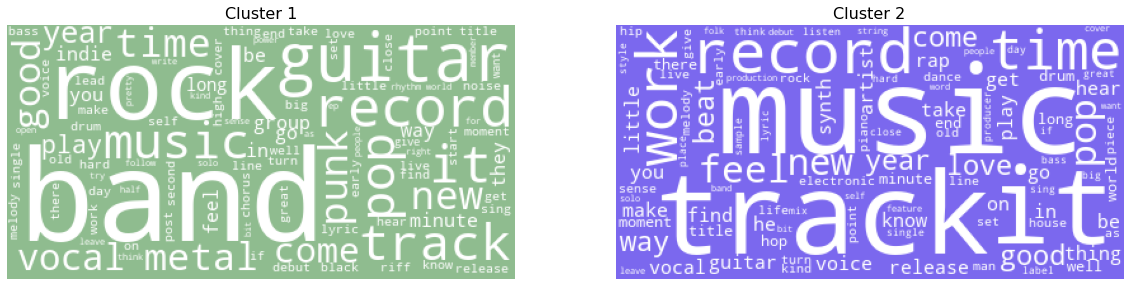

In [181]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

# first cluster with cluster label 0
words_df1 = df_tfidf[df_tfidf['preds'] == 0]
words_df1 = words_df1.drop(('pred','preds','but','that','and','this'), axis=1)
words_df1 = words_df1.sum(axis=0).sort_values(ascending=False)[:100]

wordcloud1 = WordCloud(background_color='darkseagreen', relative_scaling=0.5,
                       colormap=ListedColormap(['#FFFFFF']))
wordcloud1.generate_from_frequencies(words_df1)

# first cluster with cluster label 1
words_df2 = df_tfidf[df_tfidf['preds'] == 1]
words_df2 = words_df2.drop(('pred','preds','but','that','and','this'), axis=1)
words_df2 = words_df2.sum(axis=0).sort_values(ascending=False)[:100]

wordcloud2 = WordCloud(background_color='mediumslateblue', relative_scaling=0.5,
                       colormap=ListedColormap(['#FFFFFF']))
wordcloud2.generate_from_frequencies(words_df2)

fig, ax = plt.subplots(figsize=(20, 15), nrows=1, ncols=2)
ax = ax.flatten()

ax[0].imshow(wordcloud1)
ax[0].axis('off')
ax[0].set_title('Cluster 1', fontsize=16)

ax[1].imshow(wordcloud2)
ax[1].axis('off')
ax[1].set_title('Cluster 2', fontsize=16);

plt.show()

## Case 2: Fake News Classification

In this second case, we would attempt to simulate making a fact-checker using supervised machine learning and artificial intelligence by making a fake news classifier using the content of the different news articles that were collected from 2016 to 2018. The CSV file contains 22000+ news articles that were scraped from different news sources that were deemed to be credible or not credible. The credible news articles are all hard news under the "Nation" category of Philippine's national broadsheets: Philippine Daily Inquirer, Manila Bulletin, and The Manila Times. On the other hand, non-credible news articles were harvested from different online platforms from social media as listed [here](https://github.com/aaroncarlfernandez/Philippine-Fake-News-Corpus).

We want to be able to find a machine learning model that distinguishes between credible and non-credible news with a high level of accuracy and precision.

In [190]:
with open('ph_news_articles.csv') as f:
    print(f)

<_io.TextIOWrapper name='ph_news_articles.csv' mode='r' encoding='cp1252'>


In [215]:
df_news = pd.read_csv('f.csv')
#df_raw = df_raw.dropna()

In [211]:
df_news.isna().sum()

Headline       0
Content        0
Authors        0
Date        9141
URL            0
Brand          0
Label          0
dtype: int64

## Question 8 (10 pts.)

Preprocess the following dataset by converting all the text features to numeric format to make it ready for supervised machine learning. First, recode the `Label` column by converting the `Not Credible` values as 1 (as we want to detect fake news) and `Credible` values to 0 respectively. Afterwards, convert the textual `Content` (not the `Headline`) of every news article into numeric format using `TF-IDF Vectorizer`. Apply the same text cleaning techniques that were performed in question 6, and feel free to tweak the different hyperparameters of the `TF-IDF Vectorizer` (taking into consideration that we want to have a high model accuracy on the test set).

To get full-credit, you should be able to get a dataframe containing all the tokens/features generated by the TF-IDF vectorizer along with the decoded `Label` column.

In [216]:
df_news['Label']=df_news['Label'].apply(lambda x: 1 if x == 'Not Credible' else 0)

In [217]:
df_news['tokenized_tweets'] = df_news['Content'].apply(lambda x: ' '.join(tweet_tokenizer.tokenize(x)))
df_news['tokenized_tweets'] = df_news['tokenized_tweets'].apply(lambda x: ' '.join(regex_tokenizer.tokenize(x)))

,Headline,Content,Authors,Date,URL,Brand,Label
0,PH ranks 2nd in Asia-Pacific in deaths due to ...,Pollution caused by traditional cooking fuel i...,['Philippine Daily Inquirer'],NaN,https://newsinfo.inquirer.net/987262/ph-ranks-...,Inquirer,0
1,"Aguirre, PCSO chief deny plotting to kill ‘Ato...",Justice Secretary Vitaliano Aguirre 2nd and Ph...,['Jomar Canlas'],2017-04-28 20:12:54+00:00,https://www.manilatimes.net/aguirre-pcso-chief...,Manila Times,0
2,Duterte says charges vs ex-President will fail,President Rodrigo Duterte on Monday night desc...,['Christine O. Avendaño'],NaN,https://newsinfo.inquirer.net/914727/duterte-s...,Inquirer,0
3,Group warns BFAR on law enforcement fund,THE militant fisher folk group Pambansang Laka...,['Neil Alcober'],2017-08-12 19:54:48+00:00,https://www.manilatimes.net/group-warns-bfar-l...,Manila Times,0
4,Solon asks Duterte for jet ski to Panatag,Magdalo Rep. Gary Alejano is willing to lead t...,['Dj Yap'],NaN,https://newsinfo.inquirer.net/882744/solon-ask...,Inquirer,0
...,...,...,...,...,...,...,...
22453,Philippine Elections 2016 is not a vote for Du...,"Indeed, everybody is shocked — just shocked! —...",[],2016-04-28 05:35:44+00:00,https://www.getrealphilippines.com/2016/04/phi...,Get Real Philippines,1
22454,"28,000 families affected by floods receive aid","A TOTAL of 132,259 individuals from 28,101 fam...",['Mary Gleefer F. Jalea'],2018-08-15 00:03:17+00:00,https://www.manilatimes.net/28000-families-aff...,Manila Times,0
22455,Singer Jim Paredes Miffed That He Wasn’t Invit...,Shortly after Rod Duterte announced there will...,['Pol Pinoy'],2016-06-16 00:00:00,https://adobochronicles.com/2016/06/16/singer-...,Adobo Chronicles,1
22456,POPE FRANCIS SCOLDS PRESIDENT OBAMA,President Barack Obama met for the first time ...,['Pol Pinoy'],2017-03-27 00:00:00,https://adobochronicles.com/2014/03/27/pope-fr...,Adobo Chronicles,1


In [223]:
df_news['stopped_tweets'] = df_news['tokenized_tweets'].apply(lambda x:" ".join([text for text in 
                                          x.split() if text not in stop_words]))
df_news

,Headline,Content,Authors,Date,URL,Brand,Label,tokenized_tweets,stopped_tweets
0,PH ranks 2nd in Asia-Pacific in deaths due to ...,Pollution caused by traditional cooking fuel i...,['Philippine Daily Inquirer'],NaN,https://newsinfo.inquirer.net/987262/ph-ranks-...,Inquirer,0,Pollution caused by traditional cooking fuel i...,Pollution caused traditional cooking fuel kill...
1,"Aguirre, PCSO chief deny plotting to kill ‘Ato...",Justice Secretary Vitaliano Aguirre 2nd and Ph...,['Jomar Canlas'],2017-04-28 20:12:54+00:00,https://www.manilatimes.net/aguirre-pcso-chief...,Manila Times,0,Justice Secretary Vitaliano Aguirre nd and Phi...,Justice Secretary Vitaliano Aguirre nd Philipp...
2,Duterte says charges vs ex-President will fail,President Rodrigo Duterte on Monday night desc...,['Christine O. Avendaño'],NaN,https://newsinfo.inquirer.net/914727/duterte-s...,Inquirer,0,President Rodrigo Duterte on Monday night desc...,President Rodrigo Duterte Monday night describ...
3,Group warns BFAR on law enforcement fund,THE militant fisher folk group Pambansang Laka...,['Neil Alcober'],2017-08-12 19:54:48+00:00,https://www.manilatimes.net/group-warns-bfar-l...,Manila Times,0,THE militant fisher folk group Pambansang Laka...,THE militant fisher folk group Pambansang Laka...
4,Solon asks Duterte for jet ski to Panatag,Magdalo Rep. Gary Alejano is willing to lead t...,['Dj Yap'],NaN,https://newsinfo.inquirer.net/882744/solon-ask...,Inquirer,0,Magdalo Rep Gary Alejano is willing to lead th...,Magdalo Rep Gary Alejano willing lead charge P...
...,...,...,...,...,...,...,...,...,...
22453,Philippine Elections 2016 is not a vote for Du...,"Indeed, everybody is shocked — just shocked! —...",[],2016-04-28 05:35:44+00:00,https://www.getrealphilippines.com/2016/04/phi...,Get Real Philippines,1,Indeed everybody is shocked — just shocked — b...,Indeed everybody shocked — shocked — year pres...
22454,"28,000 families affected by floods receive aid","A TOTAL of 132,259 individuals from 28,101 fam...",['Mary Gleefer F. Jalea'],2018-08-15 00:03:17+00:00,https://www.manilatimes.net/28000-families-aff...,Manila Times,0,A TOTAL of individuals from families in five r...,A TOTAL individuals families regions Luzon aff...
22455,Singer Jim Paredes Miffed That He Wasn’t Invit...,Shortly after Rod Duterte announced there will...,['Pol Pinoy'],2016-06-16 00:00:00,https://adobochronicles.com/2016/06/16/singer-...,Adobo Chronicles,1,Shortly after Rod Duterte announced there will...,Shortly Rod Duterte announced joint inaugurati...
22456,POPE FRANCIS SCOLDS PRESIDENT OBAMA,President Barack Obama met for the first time ...,['Pol Pinoy'],2017-03-27 00:00:00,https://adobochronicles.com/2014/03/27/pope-fr...,Adobo Chronicles,1,President Barack Obama met for the first time ...,President Barack Obama met time Pope Francis T...


In [225]:
df_news['stemmed_tweets'] = df_news['stopped_tweets'].apply(lambda x: " ".join([token.lemma_ for token in
                                en(x)]))

In [243]:
df_news.to_csv('case2_stemmed.csv')

In [7]:
df_news = pd.read_csv('case2_stemmed.csv')

In [10]:
tfidf_vectorizer1 = TfidfVectorizer(min_df=0.01, max_df=0.8,max_features=30)
tfidf1 = tfidf_vectorizer1.fit_transform(df_news['stemmed_tweets'])
tfidf1

<22458x30 sparse matrix of type '<class 'numpy.float64'>'
	with 210577 stored elements in Compressed Sparse Row format>

In [244]:
df_tfidf1.to_csv('case2_vectorized.csv')

In [10]:
df_tfidf1 = pd.read_csv('case2_vectorized.csv')

In [11]:
df_tfidf1 = pd.DataFrame(tfidf1.toarray(), 
                        columns=tfidf_vectorizer1.get_feature_names())
df_tfidf1

,add,aquino,but,case,city,country,court,day,drug,duterte,...,philippine,philippines,police,president,public,say,tell,time,we,year
0,0.111360,0.000000,0.0,0.000000,0.000000,0.325381,0.000000,0.00000,0.0,0.000000,...,0.000000,0.632435,0.000000,0.000000,0.119948,0.442213,0.000000,0.109573,0.000000,0.193364
1,0.103866,0.000000,0.0,0.126638,0.000000,0.202323,0.000000,0.00000,0.0,0.097731,...,0.203905,0.000000,0.000000,0.159484,0.335628,0.648142,0.110799,0.000000,0.000000,0.000000
2,0.000000,0.323628,0.0,0.152122,0.000000,0.000000,0.000000,0.00000,0.0,0.469593,...,0.122470,0.000000,0.305650,0.383157,0.000000,0.353898,0.133096,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.213360,0.000000,0.000000,0.000000,0.000000
4,0.086016,0.000000,0.0,0.104874,0.160542,0.000000,0.113019,0.00000,0.0,0.728417,...,0.422157,0.162834,0.000000,0.066038,0.000000,0.390367,0.091757,0.000000,0.174630,0.074678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22453,0.000000,0.354712,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.600480,...,0.178977,0.172587,0.000000,0.069993,0.000000,0.000000,0.000000,0.000000,0.092545,0.474907
22454,0.130367,0.000000,0.0,0.000000,0.364979,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.159683,0.000000,0.421263,0.517691,0.000000,0.128275,0.000000,0.000000
22455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.940393,...,0.000000,0.000000,0.000000,0.153460,0.000000,0.113393,0.213227,0.000000,0.000000,0.000000
22456,0.220420,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.676904,0.000000,0.625212,0.235133,0.216884,0.000000,0.000000


## Question 9 (25 pts.)

Using the preprocessed dataset made above, iterate <b>five</b> different machine learning models (one of them must have been not discussed in class) and find the optimal hyperparameters of each model by doing a [`grid search`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or by iterating over all possible values of the hyperparameter. Use a 8-fold (i.e. `n_splits = 8`) [`Stratified K-Fold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) cross validation as a way to generate train-test-split combinations from the dataset.

Collect all performance metrics (accuracy and [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)) for each model, along with the optimal hyperparameter. Afterwards, display all of the results in a table that follows the format below:

| Model | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Optimal Hyperparameter |
| --- | --- | --- | --- | --- | --- |
| kNN | xxx | xxx | xxx | xxx | xxx |
| Random Forest | xxx | xxx | xxx | xxx | xxx | xxx |
| Gradient Boosting | xxx | xxx | xxx | xxx | xxx |

<b>Hint: </b> Try exploring the [`Stochastic Gradient Descent`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) classifier. Likewise, a [`Multinomial Naive-Bayes Classifier`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) is known to be really good with classifying text data.

Each successful model implementation would be given 5 pts. Bonus credit of additional 5 pts would be given if the student is able to find a model that distinguishes between fake and real news at an accuracy greater than or equal to 96% and a precision score that is greater than 92%.

In [15]:
import numpy as np

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [100,200]
    }
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv= 2, verbose=3,return_train_score=True,scoring = ['accuracy'],refit=False)
CV_rfc.fit(df_tfidf1, df_news['Label'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END n_estimators=100; accuracy: (train=0.990, test=0.840) total time=  10.1s
[CV 2/2] END n_estimators=100; accuracy: (train=0.989, test=0.836) total time=  10.0s
[CV 1/2] END n_estimators=200; accuracy: (train=0.990, test=0.838) total time=  19.9s
[CV 2/2] END n_estimators=200; accuracy: (train=0.989, test=0.838) total time=  19.4s


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200]}, refit=False,
             return_train_score=True, scoring=['accuracy'], verbose=3)

In [33]:
from tqdm.notebook import tqdm

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
Model = ['RFC','GBM','LogReg','LightGBM','DT']
train_accuracy = []
test_accuracy = []
optimal = []
for i in tqdm(Model):
    if i == 'RFC':
        rfc=RandomForestClassifier()
        param_grid = { 
            'n_estimators': [100,200,300]
            }
        CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                              cv= 8,verbose=3,scoring=['accuracy'],return_train_score=True, refit=False)
        CV_rfc.fit(df_tfidf1, df_news['Label'])
    if i == 'GBM':
        GBM=GradientBoostingClassifier()
        param_grid = {
            'max_features' : [0.5, 0.6, 0.7, 0.8]
        }
        CV_gbm = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 8,verbose=3,scoring=['accuracy'],return_train_score=True, refit=False)
        CV_gbm.fit(df_tfidf1, df_news['Label'])
    if i == 'LogReg':
        LR = LogisticRegression()
        CV_LR = GridSearchCV(estimator=LR, param_grid={'C':[1e-2, 0.1, 1, 10, 100]}, cv= 8,verbose=3,
                             scoring=['accuracy'],return_train_score=True, refit=False)
        CV_LR.fit(df_tfidf1, df_news['Label'])
    if i == 'LightGBM':
        LGBM = LGBMClassifier()
        CV_LG = GridSearchCV(estimator=LGBM, param_grid={'max_depth':[4,6,8,10]}, 
                             cv= 8,verbose=3,scoring=['accuracy'],return_train_score=True, refit=False)
        CV_LG.fit(df_tfidf1, df_news['Label'])
    else:
        DT = DecisionTreeClassifier()
        CV_DT = GridSearchCV(estimator=DT, param_grid={'max_features':[0.5, 0.6, 0.7, 0.8]}, 
                             cv= 8,verbose=3,scoring=['accuracy'],return_train_score=True, refit=False)
        CV_DT.fit(df_tfidf1, df_news['Label'])

  0%|          | 0/5 [00:00<?, ?it/s]

Fitting 8 folds for each of 3 candidates, totalling 24 fits
[CV 1/8] END n_estimators=100; accuracy: (train=0.989, test=0.832) total time=  26.8s
[CV 2/8] END n_estimators=100; accuracy: (train=0.989, test=0.853) total time=  26.8s
[CV 3/8] END n_estimators=100; accuracy: (train=0.988, test=0.850) total time=  26.4s
[CV 4/8] END n_estimators=100; accuracy: (train=0.988, test=0.839) total time=  26.5s
[CV 5/8] END n_estimators=100; accuracy: (train=0.988, test=0.845) total time=  27.0s
[CV 6/8] END n_estimators=100; accuracy: (train=0.989, test=0.836) total time=  26.7s
[CV 7/8] END n_estimators=100; accuracy: (train=0.988, test=0.835) total time=  26.9s
[CV 8/8] END n_estimators=100; accuracy: (train=0.988, test=0.847) total time=  26.1s
[CV 1/8] END n_estimators=200; accuracy: (train=0.989, test=0.828) total time=  52.4s
[CV 2/8] END n_estimators=200; accuracy: (train=0.989, test=0.850) total time=  52.8s
[CV 3/8] END n_estimators=200; accuracy: (train=0.988, test=0.853) total time=  

[CV 6/8] END max_features=0.5; accuracy: (train=0.989, test=0.772) total time=   1.7s
[CV 7/8] END max_features=0.5; accuracy: (train=0.988, test=0.766) total time=   1.6s
[CV 8/8] END max_features=0.5; accuracy: (train=0.988, test=0.772) total time=   1.8s
[CV 1/8] END max_features=0.6; accuracy: (train=0.989, test=0.763) total time=   2.0s
[CV 2/8] END max_features=0.6; accuracy: (train=0.989, test=0.789) total time=   2.2s
[CV 3/8] END max_features=0.6; accuracy: (train=0.988, test=0.773) total time=   2.0s
[CV 4/8] END max_features=0.6; accuracy: (train=0.988, test=0.781) total time=   2.1s
[CV 5/8] END max_features=0.6; accuracy: (train=0.988, test=0.779) total time=   2.4s
[CV 6/8] END max_features=0.6; accuracy: (train=0.989, test=0.761) total time=   2.0s
[CV 7/8] END max_features=0.6; accuracy: (train=0.988, test=0.766) total time=   2.4s
[CV 8/8] END max_features=0.6; accuracy: (train=0.988, test=0.778) total time=   2.1s
[CV 1/8] END max_features=0.7; accuracy: (train=0.989,

[CV 7/8] END max_features=0.8; accuracy: (train=0.988, test=0.778) total time=   2.6s
[CV 8/8] END max_features=0.8; accuracy: (train=0.988, test=0.765) total time=   2.6s
Fitting 8 folds for each of 4 candidates, totalling 32 fits
[LightGBM] [Warning] Unknown parameter: max_features
[CV 1/8] END max_features=0.5; accuracy: (train=0.886, test=0.833) total time=   0.9s
[LightGBM] [Warning] Unknown parameter: max_features
[CV 2/8] END max_features=0.5; accuracy: (train=0.884, test=0.855) total time=   0.8s
[LightGBM] [Warning] Unknown parameter: max_features
[CV 3/8] END max_features=0.5; accuracy: (train=0.884, test=0.853) total time=   0.8s
[LightGBM] [Warning] Unknown parameter: max_features
[CV 4/8] END max_features=0.5; accuracy: (train=0.886, test=0.841) total time=   0.8s
[LightGBM] [Warning] Unknown parameter: max_features
[CV 5/8] END max_features=0.5; accuracy: (train=0.885, test=0.850) total time=   0.8s
[LightGBM] [Warning] Unknown parameter: max_features
[CV 6/8] END max_fea

In [56]:
import joblib
joblib.dump(CV_rfc,'rfc.joblib')
joblib.dump(CV_gbm,'gbm.joblib')
joblib.dump(CV_LG,'lg.joblib')
joblib.dump(CV_DT,'dt.joblib')

['dt.joblib']

In [58]:
train_accuracy = []
test_accuracy = []
optimal = []

In [57]:
#wrong feature, retraining
LGBM = LGBMClassifier()
CV_LG = GridSearchCV(estimator=LGBM, param_grid={'max_depth':[4,6,8]}, 
                    cv= 8,verbose=3,scoring=['accuracy'],return_train_score=True, refit=False,n_jobs=1)
CV_LG.fit(df_tfidf1, df_news['Label'])

Fitting 8 folds for each of 3 candidates, totalling 24 fits
[CV 1/8] END max_depth=4; accuracy: (train=0.863, test=0.829) total time=   0.7s
[CV 2/8] END max_depth=4; accuracy: (train=0.860, test=0.856) total time=   0.8s
[CV 3/8] END max_depth=4; accuracy: (train=0.862, test=0.853) total time=   0.7s
[CV 4/8] END max_depth=4; accuracy: (train=0.862, test=0.835) total time=   0.8s
[CV 5/8] END max_depth=4; accuracy: (train=0.863, test=0.844) total time=   0.7s
[CV 6/8] END max_depth=4; accuracy: (train=0.863, test=0.840) total time=   0.7s
[CV 7/8] END max_depth=4; accuracy: (train=0.863, test=0.837) total time=   0.7s
[CV 8/8] END max_depth=4; accuracy: (train=0.861, test=0.846) total time=   0.6s
[CV 1/8] END max_depth=6; accuracy: (train=0.882, test=0.834) total time=   0.7s
[CV 2/8] END max_depth=6; accuracy: (train=0.882, test=0.858) total time=   0.8s
[CV 3/8] END max_depth=6; accuracy: (train=0.881, test=0.852) total time=   0.8s
[CV 4/8] END max_depth=6; accuracy: (train=0.883,

GridSearchCV(cv=8, estimator=LGBMClassifier(), n_jobs=1,
             param_grid={'max_depth': [4, 6, 8]}, refit=False,
             return_train_score=True, scoring=['accuracy'], verbose=3)

In [59]:
test_accuracy.append(np.mean(CV_rfc.cv_results_['mean_test_accuracy']))
train_accuracy.append(np.mean(CV_rfc.cv_results_['mean_train_accuracy']))
optimal.append(CV_LR.cv_results_['params'][np.argmax(CV_LR.cv_results_['mean_test_accuracy'])])

test_accuracy.append(np.mean(CV_gbm.cv_results_['mean_test_accuracy']))
train_accuracy.append(np.mean(CV_gbm.cv_results_['mean_train_accuracy']))
optimal.append(CV_gbm.cv_results_['params'][np.argmax(CV_gbm.cv_results_['mean_test_accuracy'])])

test_accuracy.append(np.mean(CV_LR.cv_results_['mean_test_accuracy']))
train_accuracy.append(np.mean(CV_LR.cv_results_['mean_train_accuracy']))
optimal.append(CV_LR.cv_results_['params'][np.argmax(CV_LR.cv_results_['mean_test_accuracy'])])

test_accuracy.append(np.mean(CV_LG.cv_results_['mean_test_accuracy']))
train_accuracy.append(np.mean(CV_LG.cv_results_['mean_train_accuracy']))
optimal.append(CV_LG.cv_results_['params'][np.argmax(CV_LG.cv_results_['mean_test_accuracy'])])

test_accuracy.append(np.mean(CV_DT.cv_results_['mean_test_accuracy']))
train_accuracy.append(np.mean(CV_DT.cv_results_['mean_train_accuracy']))
optimal.append(CV_DT.cv_results_['params'][np.argmax(CV_DT.cv_results_['mean_test_accuracy'])])

df_cv = pd.DataFrame({'Model': Model,'Train Accuracy' : train_accuracy, 'Test Accuracy' : test_accuracy, 'Optimal Hyperaramater' : optimal})
df_cv

,Model,Train Accuracy,Test Accuracy,Optimal Hyperaramater
0,RFC,0.988234,0.842343,{'C': 100}
1,GBM,0.850713,0.839088,{'max_features': 0.5}
2,LogReg,0.826512,0.825390,{'C': 100}
3,LightGBM,0.876476,0.844421,{'max_depth': 6}
4,DT,0.988238,0.772152,{'max_features': 0.5}


## Question 10 (5 pts.)

What do you think are the keywords from the dataset that distinguishes between credible and non-credible news articles (based from the data that was given)?

To answer this, you may display a feature importance plot of the best model that you have generated from question 9. Alternatively, you can do EDA on the resulting TF-IDF matrix. 

In [61]:
LG = LGBMClassifier(max_depth = 6)
LG.fit(df_tfidf1, df_news['Label'])


array([ 75, 102,  76,  53, 105,  70,  53,  78,  56, 164,  96,  49,  78,
        86, 109,  46, 130,  96,  76, 105, 110, 146,  58, 140,  74, 308,
        58,  85,  68, 145])

In [64]:
q10  = pd.DataFrame({'feature':df_tfidf1.columns, 'importance': LG.feature_importances_})
q10

,feature,importance
0,add,75
1,aquino,102
2,but,76
3,case,53
4,city,105
5,country,70
6,court,53
7,day,78
8,drug,56
9,duterte,164


<BarContainer object of 30 artists>

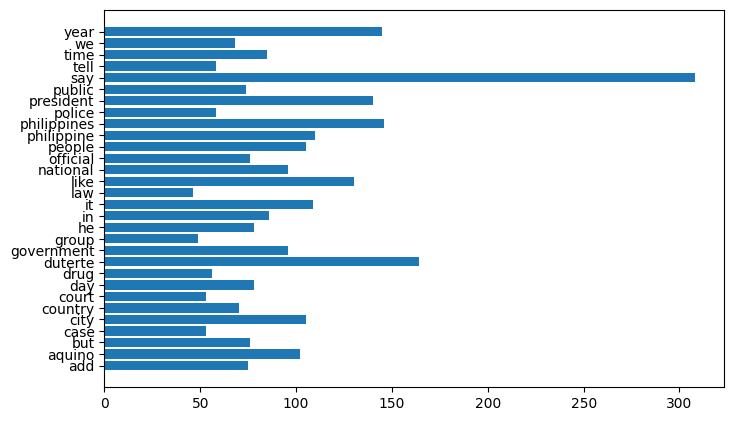

In [66]:
plt.figure(figsize=(8,5), dpi=100)
plt.barh(q10['feature'],q10['importance'])

For the model that has the highest test accuracy, some of the top keywords that determine if they are credible are 'say', 'duterte', 'philippines','year','president', and 'like'. This begs to show us that anything brought to the news that is related to the President's action to the Philippines might be shrouded in fake news.